<a href="https://colab.research.google.com/github/aviv-asulin/DeepLearning/blob/main/Anvil_Aviv_Yolo8n_exe1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install ultralytics opencv-python matplotlib

In [38]:
!pip install anvil-uplink

  Using cached argparse-1.4.0-py2.py3-none-any.whl.metadata (2.8 kB)
Using cached argparse-1.4.0-py2.py3-none-any.whl (23 kB)


In [39]:
import anvil.server
import anvil.media

input_size = (200,200)
input_shape = (200,200,3)


In [40]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np

# Load the pre-trained YOLO model from
# Load YOLOv8n model from Ultralytics
model = YOLO('yolov8n.pt')

In [41]:
@anvil.server.callable
def classify_image(file):
  with anvil.media.TempFile(file) as filename:
    img = tf.keras.utils.load_img(filename)

  results = model(img) #ultralitics Yolo model

  #use matplotlib for manipulation the image
  fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(2, 2))
  ax.axis('off')
  fig.tight_layout(pad=0)
  ax.margins(0)

  annotated_img = results[0].plot()
  iannotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
  ax.imshow(annotated_img)

  plt.savefig('annotated_img.png')

  class_indices = results[0].boxes.cls
  class_names = [results[0].names[int(idx)] for idx in class_indices]
  image = anvil.media.from_file('annotated_img.png')

  return image, class_names


In [42]:
anvil.server.connect("server_NH2BPTLZNLFYLOWEVCIFSFAD-RBGQYBGLASGGJJNB")


0: 640x512 4 persons, 2 horses, 1 potted plant, 226.3ms
Speed: 3.6ms preprocess, 226.3ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 512)

0: 480x640 1 motorcycle, 231.3ms
Speed: 4.2ms preprocess, 231.3ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


KeyboardInterrupt: 

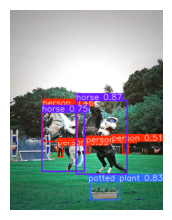

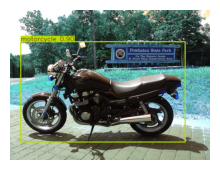

In [43]:
anvil.server.wait_forever()